In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Environment setup
grid_size = 4  # 4x4 grid
n_states = grid_size * grid_size
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
n_episodes = 500  # Number of episodes

In [19]:
# Actions
actions = ['up', 'down', 'left', 'right']
action_to_delta = {
    'up': -grid_size,
    'down': grid_size,
    'left': -1,
    'right': 1,
}

In [20]:
# Initialize value function
V = np.zeros(n_states)

In [21]:
# Rewards
rewards = np.zeros(n_states)
rewards[-1] = 1  # Goal state reward

In [22]:
# Transition function
def step(state, action):
    """Simulate environment dynamics."""
    row, col = divmod(state, grid_size)
    if action == 'up' and row > 0:
        next_state = state + action_to_delta[action]
    elif action == 'down' and row < grid_size - 1:
        next_state = state + action_to_delta[action]
    elif action == 'left' and col > 0:
        next_state = state + action_to_delta[action]
    elif action == 'right' and col < grid_size - 1:
        next_state = state + action_to_delta[action]
    else:
        next_state = state  # Invalid move, stay in the same state
    return next_state, rewards[next_state]

In [ ]:
# TD Learning
snapshots = []  
for episode in range(n_episodes):
    state = 0  # Start state
    while state != n_states - 1:  # Until goal state is reached
        # Choose a random action
        action = np.random.choice(actions)
        
        # Take action, observe reward and next state
        next_state, reward = step(state, action)
        
        # Update value function
        td_target = reward + gamma * V[next_state]
        td_error = td_target - V[state]
        V[state] += alpha * td_error
        
        # Move to the next state
        state = next_state
    
    # Store snapshots for visualization every 50 episodes
    if episode % 50 == 0:
        snapshots.append(V.copy())

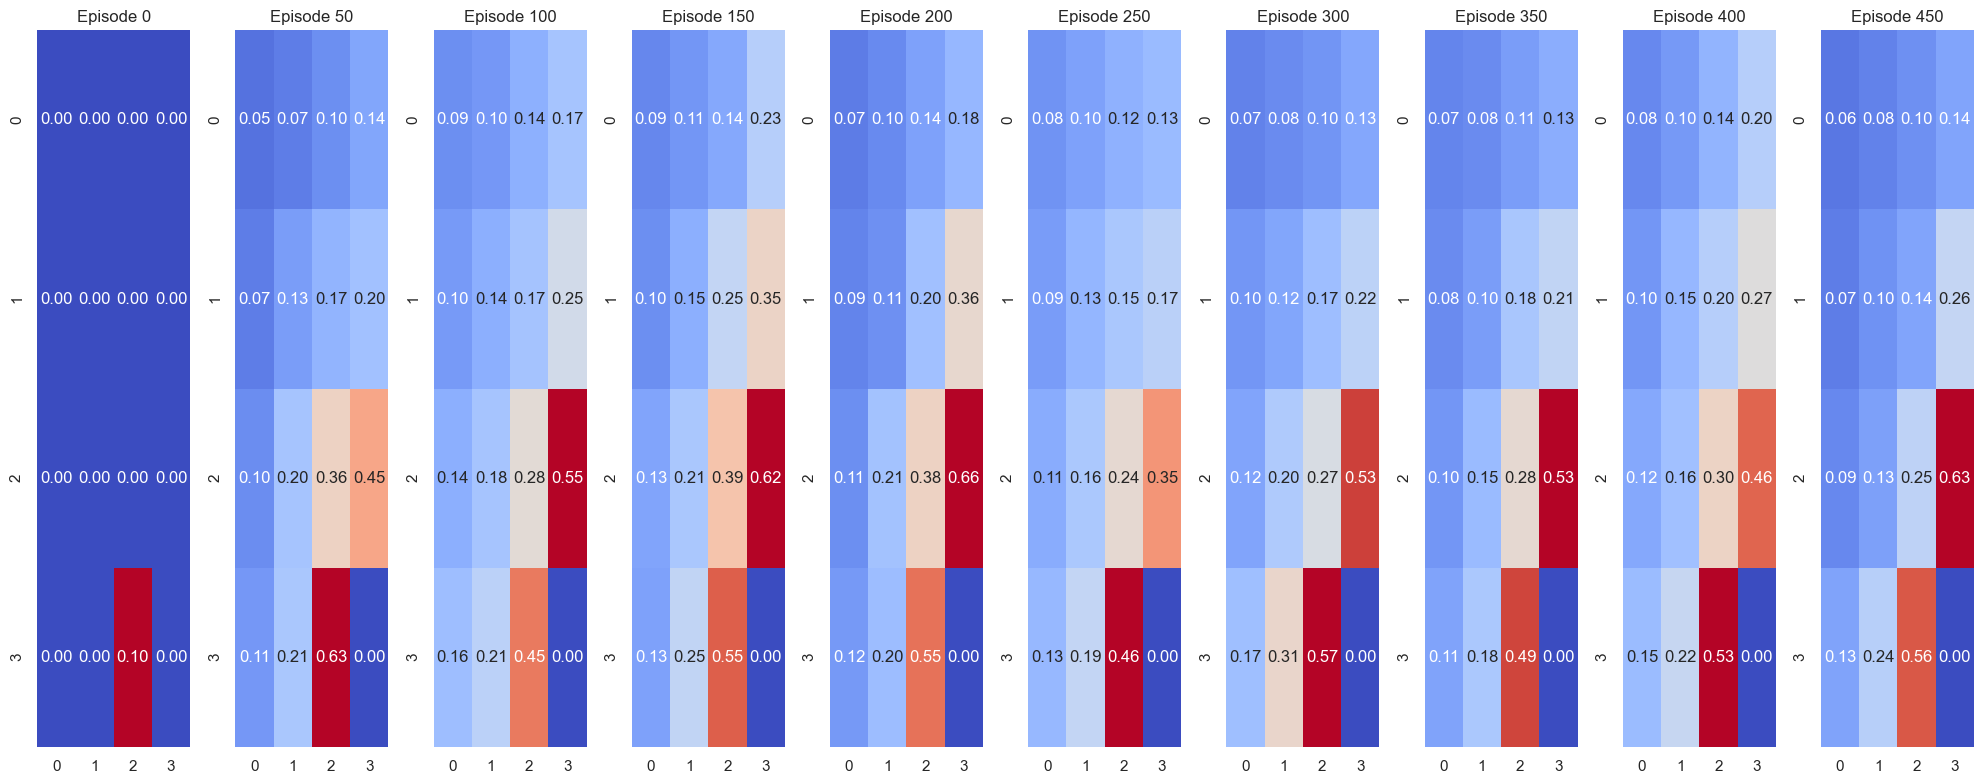

In [24]:
# Visualization
fig, axes = plt.subplots(1, len(snapshots), figsize=(20, 8))
sns.set(style="white")
for i, ax in enumerate(axes):
    grid = snapshots[i].reshape((grid_size, grid_size))
    sns.heatmap(grid, annot=True, fmt=".2f", cmap="coolwarm", cbar=False, ax=ax)
    ax.set_title(f"Episode {i * 50}")
plt.tight_layout()
plt.show()